# Case 3

* Faça uma análise não supervisionada nos dados e calcule o melhor corte dos dados usando silhoette_score para as técnicas de agrupamento: KMeans, Aglomerativo e DBSCAN.
* Talvez seja necessário fazer manipulações nos dados dos arquivos dados_bpa.csv, dados_bpp.csv e dados_dre.csv antes mesmo do agrupamento.

* Realizar as análises e gerar um agrupamento com o melhor corte do ponto de vista da métrica solicitada.

* Será necessário fazer uma análise dos grupos formados e apresentar se eles fazem sentido e quais as diferenças entre cada um.

* Ao fazer as análises, deixe bem claro os achados, hipóteses levantadas e qual a linha de raciocínio para as manipulações realizadas.


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
dados_bpa = pd.read_csv('dados_bpa.csv')
dados_bpa.drop(columns='Unnamed: 0', inplace=True)
dados_bpa.drop(columns='codigo_conta', inplace=True)
dados_bpa

,nome,tipo_demonstracao,data_exercicio,descricao_conta,valor_conta,demonstracao
0,WEG S.A.,CONSOLIDADO,2020-03-31,Ativo Total,1.737133e+10,BPA
1,WEG S.A.,CONSOLIDADO,2020-03-31,Ativo Circulante,1.060071e+10,BPA
2,WEG S.A.,CONSOLIDADO,2020-03-31,Caixa e Equivalentes de Caixa,1.587547e+09,BPA
3,WEG S.A.,CONSOLIDADO,2020-03-31,Caixa e Bancos,5.253860e+08,BPA
4,WEG S.A.,CONSOLIDADO,2020-03-31,Aplicações Financeiras,1.062161e+09,BPA
...,...,...,...,...,...,...
48297,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,INDIVIDUAL,2020-12-31,Direito de Uso em Arrendamento,2.786800e+07,BPA
48298,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,INDIVIDUAL,2020-12-31,Imobilizado em Andamento,0.000000e+00,BPA
48299,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,INDIVIDUAL,2020-12-31,Intangível,8.954700e+07,BPA
48300,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,INDIVIDUAL,2020-12-31,Intangíveis,8.954700e+07,BPA


In [4]:
dados_bpa = dados_bpa.pivot_table('valor_conta', ['nome','tipo_demonstracao','data_exercicio'], 'descricao_conta').reset_index()

In [5]:
dados_bpa.loc[dados_bpa['nome']=='WEG S.A.']

descricao_conta,nome,tipo_demonstracao,data_exercicio,(-) Amortização Acumulada,(-) Depreciação,(-) Depreciações Acumuladas,(-) PECLD,(-) Perdas de crédito Esperadas,(-) Perdas de créditos esperadas,(-) Provisão p/Crédito de Liq. Duvidosa,...,Vinculados a compromissos de recompra,Vinculados a prestação de garantias,Vinculados ao Banco Central,Vinculados à Prestação de Garantias,Vinculados à prestação de garantias,Títulos Públicos Federal (Fundos exclusivos),Ágio,Ágio em Controlada,Ágio na Aquisição de Sociedades Controladas,Ágio na aquisição de investimentos
657,WEG S.A.,CONSOLIDADO,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
658,WEG S.A.,CONSOLIDADO,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659,WEG S.A.,CONSOLIDADO,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
660,WEG S.A.,CONSOLIDADO,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
661,WEG S.A.,INDIVIDUAL,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,WEG S.A.,INDIVIDUAL,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
663,WEG S.A.,INDIVIDUAL,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
664,WEG S.A.,INDIVIDUAL,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dados_bpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Columns: 1118 entries, nome to Ágio na aquisição de investimentos
dtypes: float64(1115), object(3)
memory usage: 5.7+ MB


In [7]:
dados_bpa.columns

Index(['nome', 'tipo_demonstracao', 'data_exercicio',
       '(-) Amortização Acumulada', '(-) Depreciação',
       '(-) Depreciações Acumuladas', '(-) PECLD',
       '(-) Perdas de crédito Esperadas', '(-) Perdas de créditos esperadas',
       '(-) Provisão p/Crédito de Liq. Duvidosa',
       ...
       'Vinculados a compromissos de recompra',
       'Vinculados a prestação de garantias', 'Vinculados ao Banco Central',
       'Vinculados à Prestação de Garantias',
       'Vinculados à prestação de garantias',
       ' Títulos Públicos Federal (Fundos exclusivos) ', 'Ágio',
       'Ágio em Controlada', 'Ágio na Aquisição de Sociedades Controladas',
       'Ágio na aquisição de investimentos'],
      dtype='object', name='descricao_conta', length=1118)

In [8]:
dados_bpa['data_exercicio'].unique()

array(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'],
      dtype=object)

In [9]:
dados_bpa.describe()

descricao_conta,(-) Amortização Acumulada,(-) Depreciação,(-) Depreciações Acumuladas,(-) PECLD,(-) Perdas de crédito Esperadas,(-) Perdas de créditos esperadas,(-) Provisão p/Crédito de Liq. Duvidosa,(-) Provisão p/Perdas com Mercadorias,(-) Provisão para Crédito de Liquidação Duvidosa,(-) Provisão para Perda Esperada,...,Vinculados a compromissos de recompra,Vinculados a prestação de garantias,Vinculados ao Banco Central,Vinculados à Prestação de Garantias,Vinculados à prestação de garantias,Títulos Públicos Federal (Fundos exclusivos),Ágio,Ágio em Controlada,Ágio na Aquisição de Sociedades Controladas,Ágio na aquisição de investimentos
count,3.000000e+00,4.0,3.000000e+00,8.000000e+00,1.0,1.0,2.000000e+00,2.0,6.000000e+00,5.000000e+00,...,4.000000e+00,4.000000e+00,1.300000e+01,1.300000e+01,4.000000e+00,1.0,6.200000e+01,2.0,3.000000e+00,8.000000e+00
mean,-3.650100e+07,0.0,-1.362600e+07,-4.334212e+07,-2069000.0,-646000.0,-1.357500e+06,-28196000.0,-2.858000e+06,-3.626267e+10,...,5.748587e+09,2.756637e+09,6.397394e+08,5.082913e+09,1.611844e+09,131524000.0,5.225981e+09,43109000.0,2.716238e+10,9.780375e+07
std,1.172791e+07,0.0,7.813245e+05,6.536523e+06,NaN,NaN,1.006213e+06,0.0,1.634684e+06,2.018887e+10,...,8.025550e+09,2.612099e+09,1.096590e+09,4.172256e+09,2.783521e+09,NaN,8.290491e+09,0.0,1.178769e+09,1.041052e+07
min,-4.864900e+07,0.0,-1.442000e+07,-5.239200e+07,-2069000.0,-646000.0,-2.069000e+06,-28196000.0,-5.265000e+06,-4.705100e+10,...,8.367810e+08,3.679855e+08,0.000000e+00,1.191530e+08,3.578700e+07,131524000.0,0.000000e+00,43109000.0,2.648182e+10,8.816900e+07
25%,-4.212950e+07,0.0,-1.401000e+07,-4.914425e+07,-2069000.0,-646000.0,-1.713250e+06,-28196000.0,-3.337750e+06,-4.670200e+10,...,1.303831e+09,1.400194e+09,0.000000e+00,1.451720e+08,2.041582e+08,131524000.0,6.115000e+06,43109000.0,2.648182e+10,8.816900e+07
50%,-3.561000e+07,0.0,-1.360000e+07,-4.205750e+07,-2069000.0,-646000.0,-1.357500e+06,-28196000.0,-3.270500e+06,-4.453100e+10,...,2.223606e+09,2.103515e+09,0.000000e+00,5.845413e+09,3.148325e+08,131524000.0,7.800650e+08,43109000.0,2.648182e+10,9.680300e+07
75%,-3.042700e+07,0.0,-1.322900e+07,-3.917525e+07,-2069000.0,-646000.0,-1.001750e+06,-28196000.0,-1.608750e+06,-4.274700e+10,...,6.668362e+09,3.459959e+09,8.583685e+08,8.362109e+09,1.722519e+09,131524000.0,7.572798e+09,43109000.0,2.750266e+10,1.064335e+08
max,-2.524400e+07,0.0,-1.285800e+07,-3.318800e+07,-2069000.0,-646000.0,-6.460000e+05,-28196000.0,-9.270000e+05,-2.823550e+08,...,1.771035e+10,6.451534e+09,3.286178e+09,1.255089e+10,5.781926e+09,131524000.0,2.960652e+10,43109000.0,2.852350e+10,1.094570e+08


In [10]:
dados_bpp= pd.read_csv('dados_bpp.csv')
dados_bpp.drop(columns='Unnamed: 0', inplace=True)
dados_bpp.drop(columns='codigo_conta', inplace=True)
dados_bpp

,nome,tipo_demonstracao,data_exercicio,descricao_conta,valor_conta,demonstracao
0,WEG S.A.,CONSOLIDADO,2020-03-31,Passivo Total,1.737133e+10,BPP
1,WEG S.A.,CONSOLIDADO,2020-03-31,Passivo Circulante,4.951231e+09,BPP
2,WEG S.A.,CONSOLIDADO,2020-03-31,Obrigações Sociais e Trabalhistas,3.876190e+08,BPP
3,WEG S.A.,CONSOLIDADO,2020-03-31,Obrigações Sociais,3.876190e+08,BPP
4,WEG S.A.,CONSOLIDADO,2020-03-31,Obrigações Trabalhistas,0.000000e+00,BPP
...,...,...,...,...,...,...
79493,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,INDIVIDUAL,2020-12-31,Outros Resultados Abrangentes,0.000000e+00,BPP
79494,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,INDIVIDUAL,2020-12-31,Lucros/Prejuízos Acumulados,0.000000e+00,BPP
79495,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,INDIVIDUAL,2020-12-31,Ajustes de Avaliação Patrimonial,0.000000e+00,BPP
79496,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,INDIVIDUAL,2020-12-31,Ajustes Acumulados de Conversão,0.000000e+00,BPP


In [11]:
dados_bpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79498 entries, 0 to 79497
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nome               79498 non-null  object 
 1   tipo_demonstracao  79498 non-null  object 
 2   data_exercicio     79498 non-null  object 
 3   descricao_conta    79498 non-null  object 
 4   valor_conta        79498 non-null  float64
 5   demonstracao       79498 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.6+ MB


In [12]:
dados_bpp['data_exercicio'].unique()

array(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'],
      dtype=object)

In [13]:
dados_bpp = dados_bpp.pivot_table('valor_conta', ['nome','tipo_demonstracao','data_exercicio'], 'descricao_conta').reset_index()

In [14]:
dados_bpp

descricao_conta,nome,tipo_demonstracao,data_exercicio,(-) Ações em Tesouraria,(-) Gastos com emissão de ações,(-) Gastos na Emissão de Ações,(-) Gastos na emissão de ações,0,A disposição da assembléia geral,AGIO EM SUBSCRICAO DE ACOES,...,Ágio na Subscrição de Ações,Ágio na Transação de Capital,Ágio na Venda de Ações em Tesouraria,Ágio na aquisição de controlada sob controle comum,Ágio na incorporação de sociedade controladora,Ágio na venda de ações em tesouraria,Ágio por Subscrição de Ações,Ágio/ deságio em transação de capital,Ágio/ deságio em transações de capital,Ágio/Deságio em transação de capital
0,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3R PETROLEUM ÓLEO E GÁS S.A.,INDIVIDUAL,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,YDUQS PARTICIPACOES S.A.,CONSOLIDADO,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,583801000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,YDUQS PARTICIPACOES S.A.,INDIVIDUAL,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,584457000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,YDUQS PARTICIPACOES S.A.,INDIVIDUAL,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,584457000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,YDUQS PARTICIPACOES S.A.,INDIVIDUAL,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,584444000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dados_bpp.nunique()

descricao_conta
nome                                      88
tipo_demonstracao                          2
data_exercicio                             4
(-) Ações em Tesouraria                    5
(-) Gastos com emissão de ações            1
                                          ..
Ágio na venda de ações em tesouraria       3
Ágio por Subscrição de Ações               1
Ágio/ deságio em transação de capital      1
Ágio/ deságio em transações de capital     1
Ágio/Deságio em transação de capital       1
Length: 1671, dtype: int64

In [16]:
dados_dre= pd.read_csv('dados_dre.csv')
dados_dre.drop(columns='Unnamed: 0', inplace=True)
dados_dre.drop(columns='codigo_conta', inplace=True)
dados_dre.drop(columns='data_inicio_exercicio', inplace=True)
dados_dre.rename(columns={'data_fim_exercicio':'data_exercicio'}, inplace=True)
dados_dre

,nome,tipo_demonstracao,data_exercicio,descricao_conta,valor_conta,demonstracao
0,WEG S.A.,CONSOLIDADO,2020-03-31,Receita de Venda de Bens e/ou Serviços,3.714436e+09,DRE
1,WEG S.A.,CONSOLIDADO,2020-03-31,Custo dos Bens e/ou Serviços Vendidos,-2.616903e+09,DRE
2,WEG S.A.,CONSOLIDADO,2020-03-31,Resultado Bruto,1.097533e+09,DRE
3,WEG S.A.,CONSOLIDADO,2020-03-31,Despesas/Receitas Operacionais,-5.785960e+08,DRE
4,WEG S.A.,CONSOLIDADO,2020-03-31,Despesas com Vendas,-3.490930e+08,DRE
...,...,...,...,...,...,...
39861,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,INDIVIDUAL,2020-12-31,ON,2.189583e+03,DRE
39862,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,INDIVIDUAL,2020-12-31,PN,2.189583e+03,DRE
39863,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,INDIVIDUAL,2020-12-31,Lucro Diluído por Ação,0.000000e+00,DRE
39864,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,INDIVIDUAL,2020-12-31,ON,2.189583e+03,DRE


In [17]:
dados_dre = dados_dre.pivot_table('valor_conta', ['nome','tipo_demonstracao','data_exercicio'], 'descricao_conta').reset_index()
dados_dre

descricao_conta,nome,tipo_demonstracao,data_exercicio,'Receitas de Prestação de Serviços e Tarifas Bancárias,(-) Transferência p/ordens em curso,(Despesas) / Recuperação de Sinistros,(Perda) / reversão no valor recuperável de ativos,(Perda) Esperada com Demasis Ativos Financeiros,(Perda) Esperada com Op. de Crédito e Arrend Merc.Finan,(Perda) Esperada com Operações de Crédito e Arrendamento Mercantil Financeiro,...,Variações das Provisões Técnicas,Variações monetárias cambiais liquidas,Variações monetárias e cambiais,Variações monetárias e cambiais liquidas,Variações monetárias e cambiais líquidas,"Variações monetárias e cambiais, líquida",Venda da TBE,Vendas e Marketing,"Água, Luz, Telefone, Internet e Gás","Água, luz, telefone, internet e gás"
0,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,2020-12-31,NaN,NaN,NaN,-83377500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3R PETROLEUM ÓLEO E GÁS S.A.,INDIVIDUAL,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,YDUQS PARTICIPACOES S.A.,CONSOLIDADO,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,YDUQS PARTICIPACOES S.A.,INDIVIDUAL,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,YDUQS PARTICIPACOES S.A.,INDIVIDUAL,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677,YDUQS PARTICIPACOES S.A.,INDIVIDUAL,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dados_dre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Columns: 1075 entries, nome to Água, luz, telefone, internet e gás
dtypes: float64(1072), object(3)
memory usage: 5.6+ MB


In [19]:
dados_dre.nunique()

descricao_conta
nome                                                      88
tipo_demonstracao                                          2
data_exercicio                                             4
'Receitas de Prestação de Serviços e Tarifas Bancárias     1
(-) Transferência p/ordens em curso                        3
                                                          ..
Variações monetárias e cambiais, líquida                   3
Venda da TBE                                               1
Vendas e Marketing                                         5
Água, Luz, Telefone, Internet e Gás                        4
Água, luz, telefone, internet e gás                        8
Length: 1075, dtype: int64

In [20]:
dados_dre['data_exercicio'].unique()

array(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'],
      dtype=object)

As bases apresentam informações sobre Balanço Patrimonial Ativo (BPA), Balanço Patrimonial Passivo (BPP) 
e Demonstrativo de Resultados (DRE)
As bases apresentam informações sobre nome empresa, tipo_demonstração, data de exercicio, código e descrição da conta, assim como a informação do tipo de demonstração (BPA,BPP ou DRE).
Como as informações sobre BPA, BPP e DRE são informações distintas e correspondem a diferentes contas por demonstração, a junção das bases será feita de forma a concatená-las aos longo das linhas.

In [21]:
#df_final = pd.concat([dados_bpa, dados_bpp, dados_dre], axis=0)
df_final = pd.merge(dados_bpa,dados_bpp,on=['nome','tipo_demonstracao','data_exercicio'],how='inner')
df_final = pd.merge(df_final,dados_dre,on=['nome','tipo_demonstracao','data_exercicio'],how='inner')

In [22]:
df_final

descricao_conta,nome,tipo_demonstracao,data_exercicio,(-) Amortização Acumulada,(-) Depreciação,(-) Depreciações Acumuladas,(-) PECLD,(-) Perdas de crédito Esperadas,(-) Perdas de créditos esperadas,(-) Provisão p/Crédito de Liq. Duvidosa,...,Variações das Provisões Técnicas,Variações monetárias cambiais liquidas,Variações monetárias e cambiais,Variações monetárias e cambiais liquidas,Variações monetárias e cambiais líquidas,"Variações monetárias e cambiais, líquida",Venda da TBE,Vendas e Marketing,"Água, Luz, Telefone, Internet e Gás","Água, luz, telefone, internet e gás"
0,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3R PETROLEUM ÓLEO E GÁS S.A.,INDIVIDUAL,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,YDUQS PARTICIPACOES S.A.,CONSOLIDADO,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,YDUQS PARTICIPACOES S.A.,INDIVIDUAL,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,YDUQS PARTICIPACOES S.A.,INDIVIDUAL,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,YDUQS PARTICIPACOES S.A.,INDIVIDUAL,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_final['data_exercicio'].unique()

array(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'],
      dtype=object)

In [24]:
df_final['data_exercicio'].replace({'2020-03-31':'1TRI'}, inplace=True)
df_final['data_exercicio'].replace({'2020-06-30':'2TRI'}, inplace=True)
df_final['data_exercicio'].replace({'2020-09-30':'3TRI'}, inplace=True)
df_final['data_exercicio'].replace({'2020-12-31':'4TRI'}, inplace=True)

In [25]:
df_final.loc[(df_final['data_exercicio']=='1TRI') & (df_final['tipo_demonstracao']=='CONSOLIDADO')]

descricao_conta,nome,tipo_demonstracao,data_exercicio,(-) Amortização Acumulada,(-) Depreciação,(-) Depreciações Acumuladas,(-) PECLD,(-) Perdas de crédito Esperadas,(-) Perdas de créditos esperadas,(-) Provisão p/Crédito de Liq. Duvidosa,...,Variações das Provisões Técnicas,Variações monetárias cambiais liquidas,Variações monetárias e cambiais,Variações monetárias e cambiais liquidas,Variações monetárias e cambiais líquidas,"Variações monetárias e cambiais, líquida",Venda da TBE,Vendas e Marketing,"Água, Luz, Telefone, Internet e Gás","Água, luz, telefone, internet e gás"
0,3R PETROLEUM ÓLEO E GÁS S.A.,CONSOLIDADO,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ALPARGATAS S.A.,CONSOLIDADO,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,AMBEV S.A.,CONSOLIDADO,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,AMERICANAS S.A. - EM RECUPERAÇÃO JUDICIAL,CONSOLIDADO,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,ATACADÃO S.A.,CONSOLIDADO,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,VALE S.A.,CONSOLIDADO,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641,VIA S.A.,CONSOLIDADO,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,VIBRA ENERGIA S/A,CONSOLIDADO,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,WEG S.A.,CONSOLIDADO,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora unidos cada linha da base corresponde a informação da conta de uma empresa, seu tipo de demonstração, a data de exercício classificada por trimestre e seus valores. Dessa forma serão removidas as colunas codigo_conta e descrição_conta, utilizando para agrupamento nome da empresa, tipo_demonstracao, data_exercicio, valor_conta e demonstracao.

## Demonstração Individual

In [31]:
df_individual = df_final.loc[df_final['tipo_demonstracao']=='INDIVIDUAL']
df_individual.drop('tipo_demonstracao', axis=1, inplace=True)
df_individual.head()

descricao_conta,nome,data_exercicio,(-) Amortização Acumulada,(-) Depreciação,(-) Depreciações Acumuladas,(-) PECLD,(-) Perdas de crédito Esperadas,(-) Perdas de créditos esperadas,(-) Provisão p/Crédito de Liq. Duvidosa,(-) Provisão p/Perdas com Mercadorias,...,Variações das Provisões Técnicas,Variações monetárias cambiais liquidas,Variações monetárias e cambiais,Variações monetárias e cambiais liquidas,Variações monetárias e cambiais líquidas,"Variações monetárias e cambiais, líquida",Venda da TBE,Vendas e Marketing,"Água, Luz, Telefone, Internet e Gás","Água, luz, telefone, internet e gás"
4,3R PETROLEUM ÓLEO E GÁS S.A.,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3R PETROLEUM ÓLEO E GÁS S.A.,2TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3R PETROLEUM ÓLEO E GÁS S.A.,3TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3R PETROLEUM ÓLEO E GÁS S.A.,4TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,ALPARGATAS S.A.,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# remoção de colunas que tem mais de 50% dos dados nulos
df_individual = df_individual.dropna(thresh=df_individual.shape[0]*0.5,how='all',axis=1)

In [37]:
# somar por data de exercício
df_individual = df_individual.groupby('nome').sum()

In [38]:
df_individual

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Perdas pela Não Recuperabilidade de Ativos,Receita de Venda de Bens e/ou Serviços,Receitas Financeiras,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial
nome,,,,,,,,,,,,,,,,,,,,,
3R PETROLEUM ÓLEO E GÁS S.A.,3.135710e+08,0.0,0.000000e+00,156785500.0,5.812970e+08,1.495434e+09,5.492000e+06,2.076731e+09,0.0,0.0,...,0.0,0.000000e+00,3.440000e+05,-3.518500e+08,-3.709230e+08,0.000000e+00,-1.907300e+07,-3.557830e+08,0.0,-3.329610e+08
ALPARGATAS S.A.,2.124210e+08,0.0,1.300410e+08,0.0,1.216905e+10,7.763364e+09,2.678163e+09,1.993241e+10,0.0,63710000.0,...,0.0,4.925200e+09,3.817510e+08,4.183695e+08,4.499110e+08,2.083195e+09,3.154150e+07,5.155390e+08,-235620500.0,-1.348150e+08
AMBEV S.A.,5.955907e+09,0.0,2.977954e+09,267588500.0,5.812102e+10,4.138560e+11,3.671346e+10,4.719771e+11,0.0,0.0,...,0.0,5.581816e+10,5.190490e+09,1.739146e+10,1.603820e+10,2.210519e+10,-1.353258e+09,1.767796e+10,0.0,6.819784e+09
AMERICANAS S.A. - EM RECUPERAÇÃO JUDICIAL,1.232371e+10,0.0,6.336476e+09,0.0,4.595170e+10,2.715915e+10,1.162784e+10,7.311085e+10,0.0,0.0,...,0.0,1.922567e+10,7.402850e+08,1.318695e+08,-7.625745e+08,5.839630e+09,-8.944440e+08,-5.824120e+08,0.0,-1.246635e+08
ATACADÃO S.A.,0.000000e+00,0.0,0.000000e+00,0.0,3.284300e+10,8.286000e+10,1.291700e+10,1.157030e+11,0.0,0.0,...,0.0,9.533950e+10,2.112500e+09,7.177000e+09,6.721000e+09,1.445550e+10,-4.560000e+08,5.113000e+09,0.0,8.790000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALE S.A.,1.811252e+09,0.0,9.056260e+08,0.0,2.201072e+11,1.464913e+12,2.336727e+11,1.685020e+12,0.0,0.0,...,-607870000.0,2.419617e+11,1.696280e+09,1.046642e+11,5.121872e+10,1.530077e+11,-5.344547e+10,5.222917e+10,0.0,2.239302e+09
VIA S.A.,0.000000e+00,0.0,0.000000e+00,0.0,6.507100e+10,4.972600e+10,2.468800e+10,1.147970e+11,0.0,0.0,...,0.0,5.730950e+10,0.000000e+00,3.674000e+09,1.947500e+09,1.895850e+10,-1.726500e+09,1.717500e+09,0.0,-1.600000e+07
VIBRA ENERGIA S/A,0.000000e+00,0.0,0.000000e+00,0.0,5.596800e+10,5.557700e+10,2.726800e+10,1.115450e+11,0.0,0.0,...,0.0,1.658710e+11,8.465000e+08,6.535500e+09,6.672500e+09,8.448000e+09,1.370000e+08,4.990000e+09,0.0,1.290000e+08


#### Normalizar os dados

In [48]:
scaler = MinMaxScaler()
norm = scaler.fit_transform(df_individual)
df_scaler_ind = pd.DataFrame(norm,columns=df_individual.columns)
df_scaler_ind.head()

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Perdas pela Não Recuperabilidade de Ativos,Receita de Venda de Bens e/ou Serviços,Receitas Financeiras,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial
0,0.006760,0.0,0.000000,0.059969,0.000186,0.000352,0.000000,0.000219,0.0,0.000000,...,0.763846,0.000023,0.030408,0.201449,0.750293,0.016418,0.991244,0.644174,0.443693,0.389674
1,0.004579,0.0,0.005889,0.000000,0.004274,0.001828,0.001156,0.002746,0.0,0.004277,...,0.763846,0.009319,0.047538,0.207305,0.754266,0.026528,0.991469,0.650070,0.402148,0.392595
2,0.128393,0.0,0.134857,0.102349,0.020487,0.097465,0.015872,0.066722,0.0,0.000000,...,0.763846,0.105379,0.263503,0.336370,0.829717,0.123697,0.985317,0.766203,0.443693,0.495108
3,0.265666,0.0,0.286949,0.000000,0.016194,0.006396,0.005025,0.010272,0.0,0.000000,...,0.763846,0.036311,0.063640,0.205127,0.748397,0.044759,0.987356,0.642640,0.443693,0.392744
4,0.000000,0.0,0.000000,0.000000,0.011569,0.019514,0.005583,0.016300,0.0,0.000000,...,0.763846,0.179976,0.125267,0.258699,0.784620,0.086572,0.989303,0.681179,0.443693,0.407539


## DBSCAN

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [63]:
from sklearn.cluster import DBSCAN

for ep in [1, 2, 5, 7, 12, 19, 23, 25]:
    for i in [2,3,4,5]:
        dbscan_cluster = DBSCAN(eps=ep, min_samples=i)
        cluster_labels = dbscan_cluster.fit_predict(df_scaler_ind)
    
        if len(np.unique(dbscan_cluster.labels_)) > 1:
            silhouette_avg = silhouette_score(df_scaler_ind, cluster_labels)
            print('Epsilon: {} Clusters: {} Silhouette: {}'.format(ep, np.unique(dbscan_cluster.labels_),silhouette_avg))

Epsilon: 1 Clusters: [-1  0] Silhouette: 0.3259744112987788
Epsilon: 1 Clusters: [-1  0] Silhouette: 0.3259744112987788
Epsilon: 1 Clusters: [-1  0] Silhouette: 0.3259744112987788
Epsilon: 1 Clusters: [-1  0] Silhouette: 0.3259744112987788
Epsilon: 2 Clusters: [-1  0  1] Silhouette: 0.46898083939370144
Epsilon: 2 Clusters: [-1  0] Silhouette: 0.541952739570763
Epsilon: 2 Clusters: [-1  0] Silhouette: 0.541952739570763
Epsilon: 2 Clusters: [-1  0] Silhouette: 0.541952739570763
Epsilon: 5 Clusters: [-1  0] Silhouette: 0.7332123936036132
Epsilon: 5 Clusters: [-1  0] Silhouette: 0.7332123936036132
Epsilon: 5 Clusters: [-1  0] Silhouette: 0.7332123936036132
Epsilon: 5 Clusters: [-1  0] Silhouette: 0.7332123936036132


In [69]:
dbscan_cluster = DBSCAN(eps=2, min_samples=2)
cluster_labels = dbscan_cluster.fit_predict(df_scaler_ind)

In [70]:
df_individual['dbscan_eps2'] = cluster_labels

In [71]:
df_individual.head()

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Receita de Venda de Bens e/ou Serviços,Receitas Financeiras,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial,dbscan_eps2
nome,,,,,,,,,,,,,,,,,,,,,
3R PETROLEUM ÓLEO E GÁS S.A.,3.135710e+08,0.0,0.000000e+00,156785500.0,5.812970e+08,1.495434e+09,5.492000e+06,2.076731e+09,0.0,0.0,...,0.000000e+00,3.440000e+05,-3.518500e+08,-3.709230e+08,0.000000e+00,-1.907300e+07,-3.557830e+08,0.0,-3.329610e+08,0
ALPARGATAS S.A.,2.124210e+08,0.0,1.300410e+08,0.0,1.216905e+10,7.763364e+09,2.678163e+09,1.993241e+10,0.0,63710000.0,...,4.925200e+09,3.817510e+08,4.183695e+08,4.499110e+08,2.083195e+09,3.154150e+07,5.155390e+08,-235620500.0,-1.348150e+08,0
AMBEV S.A.,5.955907e+09,0.0,2.977954e+09,267588500.0,5.812102e+10,4.138560e+11,3.671346e+10,4.719771e+11,0.0,0.0,...,5.581816e+10,5.190490e+09,1.739146e+10,1.603820e+10,2.210519e+10,-1.353258e+09,1.767796e+10,0.0,6.819784e+09,-1
AMERICANAS S.A. - EM RECUPERAÇÃO JUDICIAL,1.232371e+10,0.0,6.336476e+09,0.0,4.595170e+10,2.715915e+10,1.162784e+10,7.311085e+10,0.0,0.0,...,1.922567e+10,7.402850e+08,1.318695e+08,-7.625745e+08,5.839630e+09,-8.944440e+08,-5.824120e+08,0.0,-1.246635e+08,0
ATACADÃO S.A.,0.000000e+00,0.0,0.000000e+00,0.0,3.284300e+10,8.286000e+10,1.291700e+10,1.157030e+11,0.0,0.0,...,9.533950e+10,2.112500e+09,7.177000e+09,6.721000e+09,1.445550e+10,-4.560000e+08,5.113000e+09,0.0,8.790000e+08,0


In [72]:
df_individual.loc[df_individual['dbscan_eps2']==1]

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Receita de Venda de Bens e/ou Serviços,Receitas Financeiras,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial,dbscan_eps2
nome,,,,,,,,,,,,,,,,,,,,,
BCO BRASIL S.A.,0.0,0.0,0.0,0.0,2.834285e+12,0.0,2.312756e+12,7.066322e+12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
BCO SANTANDER (BRASIL) S.A.,0.0,0.0,0.0,0.0,1.654941e+12,0.0,1.198714e+12,3.970294e+12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Kmeans

In [64]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

Numero de clusters: [0 1] Silhouette: 0.6944205847126681
Numero de clusters: [0 1 2] Silhouette: 0.5402012478104102
Numero de clusters: [0 1 2 3] Silhouette: 0.457189316538706
Numero de clusters: [0 1 2 3 4] Silhouette: 0.4760714207976435


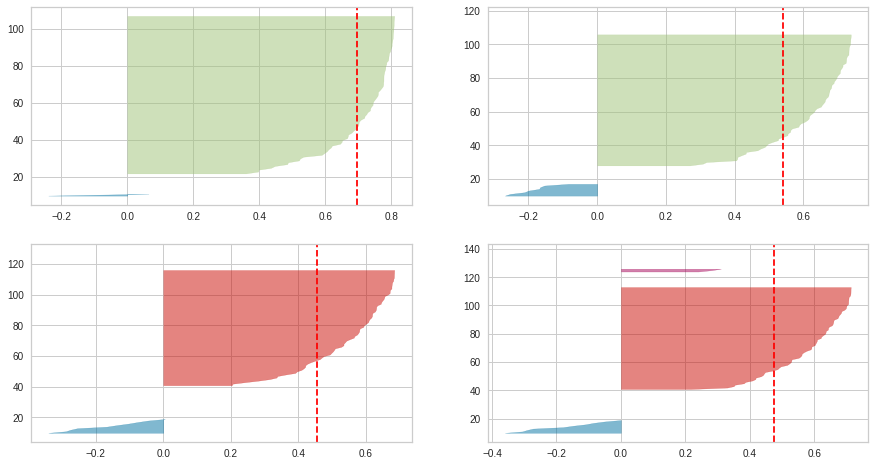

In [80]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=100, max_iter=100, random_state=42)

    q, mod = divmod(i, 2)
    
    cluster_labels = km.fit_predict(df_scaler_ind)
    silhouette_avg = silhouette_score(df_scaler_ind, cluster_labels)
    print('Numero de clusters: {} Silhouette: {}'.format(np.unique(km.labels_),silhouette_avg))
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaler_ind) 

In [81]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, random_state=42)
cluster_labels = km.fit_predict(df_scaler_ind)

In [82]:
df_individual['km2'] = cluster_labels

In [83]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int32)

In [84]:
df_individual.loc[df_individual['km2']==0]

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Receitas Financeiras,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial,dbscan_eps2,km2
nome,,,,,,,,,,,,,,,,,,,,,
PETROLEO BRASILEIRO S.A. PETROBRAS,1.107300e+10,0.0,0.0,423000000.0,4.902300e+11,4.246181e+12,4.447510e+11,4.736411e+12,0.0,1.489650e+10,...,6.759500e+09,6.776250e+10,-1.553820e+11,2.026710e+11,-2.231445e+11,-9.555350e+10,0.0,4.107200e+10,-1,0
VALE S.A.,1.811252e+09,0.0,905626000.0,0.0,2.201072e+11,1.464913e+12,2.336727e+11,1.685020e+12,0.0,0.000000e+00,...,1.696280e+09,1.046642e+11,5.121872e+10,1.530077e+11,-5.344547e+10,5.222917e+10,0.0,2.239302e+09,-1,0


## Agrupamento Hierarquico Aglomerativo

In [85]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

Numero de clusters: [0 1] Silhouette: 0.7332123936036132
Numero de clusters: [0 1 2] Silhouette: 0.5232849798775321
Numero de clusters: [0 1 2 3] Silhouette: 0.5281519258828472
Numero de clusters: [0 1 2 3 4] Silhouette: 0.5016925210986254


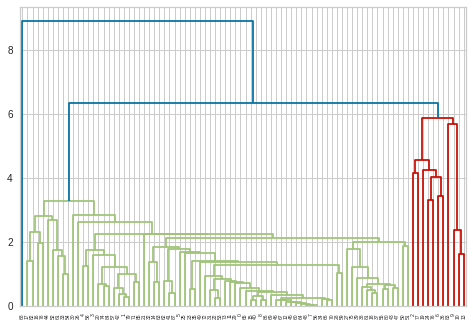

In [86]:
for i in [2, 3, 4, 5]:
    
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')

    model.fit(df_scaler_ind)
    cluster_labels = model.labels_
    silhouette_avg = silhouette_score(df_scaler_ind, cluster_labels)
    print('Numero de clusters: {} Silhouette: {}'.format(np.unique(model.labels_),silhouette_avg))
    
dendrogram = sch.dendrogram(sch.linkage(df_scaler_ind, method='ward'))

Todos os algoritmos tem mostrado melhor valor de silhoutte para formação de 2 cluster. Entretanto, vale observar que um desses grupos possui densidade bem inferior ao outro.

In [91]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(df_scaler_ind)
cluster_labels = model.labels_

In [92]:
df_individual['agg2'] = cluster_labels

In [95]:
df_individual.loc[df_individual['agg2']==1]

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial,dbscan_eps2,km2,agg2
nome,,,,,,,,,,,,,,,,,,,,,
PETROLEO BRASILEIRO S.A. PETROBRAS,1.107300e+10,0.0,0.0,423000000.0,4.902300e+11,4.246181e+12,4.447510e+11,4.736411e+12,0.0,1.489650e+10,...,6.776250e+10,-1.553820e+11,2.026710e+11,-2.231445e+11,-9.555350e+10,0.0,4.107200e+10,-1,0,1


## Demonstração Consolidado

In [118]:
df_consolidado = df_final.loc[df_final['tipo_demonstracao']=='CONSOLIDADO']
df_consolidado.drop('tipo_demonstracao', axis=1, inplace=True)
df_consolidado.head()

descricao_conta,nome,data_exercicio,(-) Amortização Acumulada,(-) Depreciação,(-) Depreciações Acumuladas,(-) PECLD,(-) Perdas de crédito Esperadas,(-) Perdas de créditos esperadas,(-) Provisão p/Crédito de Liq. Duvidosa,(-) Provisão p/Perdas com Mercadorias,...,Variações das Provisões Técnicas,Variações monetárias cambiais liquidas,Variações monetárias e cambiais,Variações monetárias e cambiais liquidas,Variações monetárias e cambiais líquidas,"Variações monetárias e cambiais, líquida",Venda da TBE,Vendas e Marketing,"Água, Luz, Telefone, Internet e Gás","Água, luz, telefone, internet e gás"
0,3R PETROLEUM ÓLEO E GÁS S.A.,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3R PETROLEUM ÓLEO E GÁS S.A.,2TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3R PETROLEUM ÓLEO E GÁS S.A.,3TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3R PETROLEUM ÓLEO E GÁS S.A.,4TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ALPARGATAS S.A.,1TRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# remoção de colunas que tem mais de 50% dos dados nulos
df_consolidado = df_consolidado.dropna(thresh=df_consolidado.shape[0]*0.5,how='all',axis=1)

In [120]:
# somar por data de exercício
df_consolidado = df_consolidado.groupby('nome').sum()

In [121]:
df_consolidado

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Perdas pela Não Recuperabilidade de Ativos,Receita de Venda de Bens e/ou Serviços,Receitas Financeiras,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial
nome,,,,,,,,,,,,,,,,,,,,,
3R PETROLEUM ÓLEO E GÁS S.A.,4.175200e+08,0.0,0.000000e+00,208760000.0,8.807330e+08,2.500275e+09,1.312750e+08,3.381008e+09,0.0,0.000000e+00,...,0.000000e+00,3.460295e+08,9.187100e+07,-2.276100e+08,-4.933030e+08,1.673770e+08,-2.656930e+08,-4.643935e+08,0.000000e+00,0.000000e+00
ALPARGATAS S.A.,2.124210e+08,0.0,1.300410e+08,0.0,1.401718e+10,8.789873e+09,2.757273e+09,2.280705e+10,0.0,6.371000e+07,...,0.000000e+00,6.403846e+09,3.931450e+08,4.679990e+08,4.044945e+08,3.309582e+09,-6.350450e+07,4.364295e+08,-1.988165e+08,0.000000e+00
AMBEV S.A.,3.232597e+09,0.0,1.616298e+09,401814000.0,1.417959e+11,3.455380e+11,5.128612e+10,4.873339e+11,0.0,0.000000e+00,...,0.000000e+00,1.166117e+11,4.211957e+09,2.841314e+10,2.056958e+10,6.213324e+10,-7.843562e+09,1.842036e+10,0.000000e+00,-9.187550e+07
AMERICANAS S.A. - EM RECUPERAÇÃO JUDICIAL,1.298546e+10,0.0,6.667352e+09,0.0,4.730929e+10,2.695220e+10,1.174700e+10,7.426149e+10,0.0,0.000000e+00,...,0.000000e+00,1.983128e+10,7.541610e+08,1.486780e+08,-7.708075e+08,5.562356e+09,-9.194855e+08,-5.824120e+08,0.000000e+00,-1.418360e+08
ATACADÃO S.A.,4.880000e+08,0.0,5.335000e+08,0.0,8.833700e+10,9.718200e+10,3.056300e+10,1.855190e+11,0.0,0.000000e+00,...,0.000000e+00,1.453605e+11,2.253000e+09,8.912500e+09,7.647500e+09,2.872650e+10,-1.265000e+09,5.472500e+09,0.000000e+00,-1.750000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALE S.A.,4.005635e+09,0.0,2.002818e+09,0.0,4.406399e+11,1.383640e+12,3.397612e+11,1.824280e+12,0.0,1.046458e+09,...,-1.223920e+10,3.871564e+11,3.994700e+09,1.177927e+11,6.140241e+10,1.978855e+11,-5.639029e+10,5.743978e+10,-8.875000e+09,-1.113244e+10
VIA S.A.,0.000000e+00,0.0,0.000000e+00,0.0,6.548600e+10,5.055800e+10,2.513600e+10,1.160440e+11,0.0,0.000000e+00,...,0.000000e+00,5.731100e+10,0.000000e+00,3.633500e+09,1.894500e+09,1.891900e+10,-1.739000e+09,1.717500e+09,0.000000e+00,1.130000e+08
VIBRA ENERGIA S/A,0.000000e+00,0.0,0.000000e+00,0.0,5.593400e+10,5.664800e+10,2.721500e+10,1.125820e+11,0.0,0.000000e+00,...,0.000000e+00,1.673370e+11,8.665000e+08,6.472500e+09,6.682000e+09,8.629000e+09,2.095000e+08,4.990000e+09,0.000000e+00,4.500000e+06


#### Normalizar os dados

In [122]:
scaler = MinMaxScaler()
norm = scaler.fit_transform(df_consolidado)
df_scaler_con = pd.DataFrame(norm,columns=df_consolidado.columns)
df_scaler_con.head()

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Perdas pela Não Recuperabilidade de Ativos,Receita de Venda de Bens e/ou Serviços,Receitas Financeiras,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial
0,0.006737,0.0,0.000000,0.050432,0.001336,0.000762,0.000275,0.000432,0.0,0.000000,...,1.0,0.000607,0.072953,0.074276,0.697200,0.014108,0.982513,0.630077,0.737732,0.477532
1,0.003427,0.0,0.004281,0.000000,0.021256,0.002680,0.005776,0.002917,0.0,0.004105,...,1.0,0.011233,0.085717,0.079732,0.701592,0.026593,0.984006,0.635832,0.721205,0.477532
2,0.052158,0.0,0.053211,0.097070,0.215020,0.105341,0.107427,0.062322,0.0,0.000000,...,1.0,0.204552,0.247509,0.298927,0.800242,0.260325,0.926552,0.750723,0.737732,0.473591
3,0.209520,0.0,0.219501,0.000000,0.071740,0.008217,0.024606,0.009497,0.0,0.000000,...,1.0,0.034787,0.101012,0.077227,0.695843,0.035544,0.977685,0.629323,0.737732,0.471448
4,0.007874,0.0,0.017564,0.000000,0.133955,0.029627,0.064019,0.023725,0.0,0.000000,...,1.0,0.254981,0.164514,0.145969,0.737026,0.127585,0.975133,0.668005,0.737732,0.476782


## DBSCAN

In [123]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [124]:
from sklearn.cluster import DBSCAN

for ep in [5.05,5.1,5.3, 5.45,5.5,5.6,5.7,6]:
    for i in [2,3,4,5]:
        dbscan_cluster = DBSCAN(eps=ep, min_samples=i)
        cluster_labels = dbscan_cluster.fit_predict(df_scaler_con)
    
        if len(np.unique(dbscan_cluster.labels_)) > 1:
            silhouette_avg = silhouette_score(df_scaler_con, cluster_labels)
            print('Epsilon: {} Clusters: {} Silhouette: {}'.format(ep, np.unique(dbscan_cluster.labels_),silhouette_avg))

Epsilon: 5.05 Clusters: [-1  0] Silhouette: 0.6929176903254678
Epsilon: 5.05 Clusters: [-1  0] Silhouette: 0.6929176903254678
Epsilon: 5.05 Clusters: [-1  0] Silhouette: 0.6929176903254678
Epsilon: 5.05 Clusters: [-1  0] Silhouette: 0.6929176903254678
Epsilon: 5.1 Clusters: [-1  0] Silhouette: 0.6929176903254678
Epsilon: 5.1 Clusters: [-1  0] Silhouette: 0.6929176903254678
Epsilon: 5.1 Clusters: [-1  0] Silhouette: 0.6929176903254678
Epsilon: 5.1 Clusters: [-1  0] Silhouette: 0.6929176903254678
Epsilon: 5.3 Clusters: [-1  0] Silhouette: 0.6929176903254678
Epsilon: 5.3 Clusters: [-1  0] Silhouette: 0.6929176903254678
Epsilon: 5.3 Clusters: [-1  0] Silhouette: 0.6929176903254678
Epsilon: 5.3 Clusters: [-1  0] Silhouette: 0.6929176903254678
Epsilon: 5.45 Clusters: [-1  0] Silhouette: 0.7035463876504292
Epsilon: 5.45 Clusters: [-1  0] Silhouette: 0.7035463876504292
Epsilon: 5.45 Clusters: [-1  0] Silhouette: 0.7035463876504292
Epsilon: 5.45 Clusters: [-1  0] Silhouette: 0.7035463876504292


In [125]:
dbscan_cluster = DBSCAN(eps=5.7, min_samples=2)
cluster_labels = dbscan_cluster.fit_predict(df_scaler_con)

In [115]:
# DBSCAN não conseguiu formar grupos separados, apenas um grupo e um outlier

In [126]:
df_consolidado['dbscan_eps5.7'] = cluster_labels

In [127]:
df_consolidado.head()

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Receita de Venda de Bens e/ou Serviços,Receitas Financeiras,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial,dbscan_eps5.7
nome,,,,,,,,,,,,,,,,,,,,,
3R PETROLEUM ÓLEO E GÁS S.A.,4.175200e+08,0.0,0.000000e+00,208760000.0,8.807330e+08,2.500275e+09,1.312750e+08,3.381008e+09,0.0,0.0,...,3.460295e+08,9.187100e+07,-2.276100e+08,-4.933030e+08,1.673770e+08,-2.656930e+08,-4.643935e+08,0.0,0.0,0
ALPARGATAS S.A.,2.124210e+08,0.0,1.300410e+08,0.0,1.401718e+10,8.789873e+09,2.757273e+09,2.280705e+10,0.0,63710000.0,...,6.403846e+09,3.931450e+08,4.679990e+08,4.044945e+08,3.309582e+09,-6.350450e+07,4.364295e+08,-198816500.0,0.0,0
AMBEV S.A.,3.232597e+09,0.0,1.616298e+09,401814000.0,1.417959e+11,3.455380e+11,5.128612e+10,4.873339e+11,0.0,0.0,...,1.166117e+11,4.211957e+09,2.841314e+10,2.056958e+10,6.213324e+10,-7.843562e+09,1.842036e+10,0.0,-91875500.0,0
AMERICANAS S.A. - EM RECUPERAÇÃO JUDICIAL,1.298546e+10,0.0,6.667352e+09,0.0,4.730929e+10,2.695220e+10,1.174700e+10,7.426149e+10,0.0,0.0,...,1.983128e+10,7.541610e+08,1.486780e+08,-7.708075e+08,5.562356e+09,-9.194855e+08,-5.824120e+08,0.0,-141836000.0,0
ATACADÃO S.A.,4.880000e+08,0.0,5.335000e+08,0.0,8.833700e+10,9.718200e+10,3.056300e+10,1.855190e+11,0.0,0.0,...,1.453605e+11,2.253000e+09,8.912500e+09,7.647500e+09,2.872650e+10,-1.265000e+09,5.472500e+09,0.0,-17500000.0,0


In [129]:
df_consolidado.loc[df_consolidado['dbscan_eps5.7']==-1]

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Receita de Venda de Bens e/ou Serviços,Receitas Financeiras,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial,dbscan_eps5.7
nome,,,,,,,,,,,,,,,,,,,,,
PETROLEO BRASILEIRO S.A. PETROBRAS,1.350400e+10,0.0,0.0,435000000.0,6.594550e+11,3.280181e+12,4.774060e+11,3.939636e+12,0.0,1.552050e+10,...,5.700840e+11,5.952500e+09,-9.697000e+09,-1.430090e+11,2.482880e+11,-1.333120e+11,-9.909050e+10,0.0,-8.700500e+09,-1


## Kmeans

In [130]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

Numero de clusters: [0 1] Silhouette: 0.6929176903254678
Numero de clusters: [0 1 2] Silhouette: 0.4994431510456232
Numero de clusters: [0 1 2 3] Silhouette: 0.5004970017985266
Numero de clusters: [0 1 2 3 4] Silhouette: 0.48556629956170094


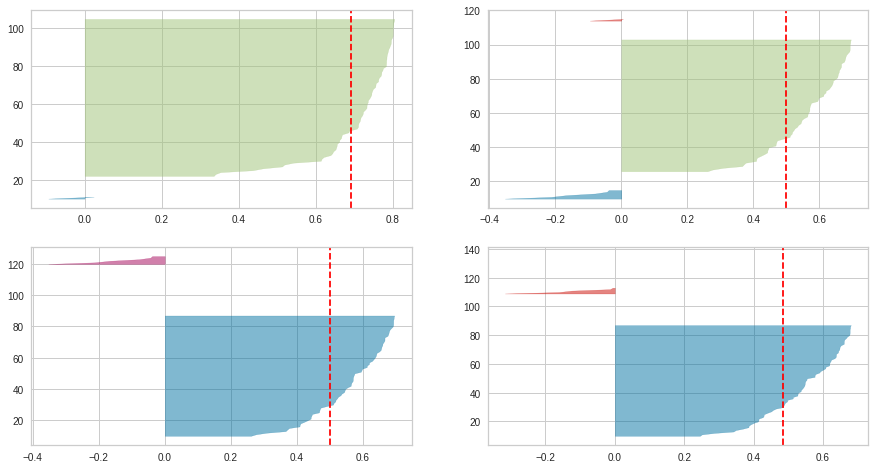

In [131]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=100, max_iter=100, random_state=42)

    q, mod = divmod(i, 2)
    
    cluster_labels = km.fit_predict(df_scaler_con)
    silhouette_avg = silhouette_score(df_scaler_con, cluster_labels)
    print('Numero de clusters: {} Silhouette: {}'.format(np.unique(km.labels_),silhouette_avg))
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaler_con) 

In [148]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, random_state=42)
cluster_labels = km.fit_predict(df_scaler_con)

In [149]:
df_consolidado['km2'] = cluster_labels

In [150]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int32)

In [151]:
df_consolidado.loc[df_consolidado['km2']==0]

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Receitas Financeiras,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial,dbscan_eps5.7,km2
nome,,,,,,,,,,,,,,,,,,,,,
PETROLEO BRASILEIRO S.A. PETROBRAS,1.350400e+10,0.0,0.000000e+00,435000000.0,6.594550e+11,3.280181e+12,4.774060e+11,3.939636e+12,0.0,1.552050e+10,...,5.952500e+09,-9.697000e+09,-1.430090e+11,2.482880e+11,-1.333120e+11,-9.909050e+10,0.000000e+00,-8.700500e+09,-1,0
VALE S.A.,4.005635e+09,0.0,2.002818e+09,0.0,4.406399e+11,1.383640e+12,3.397612e+11,1.824280e+12,0.0,1.046458e+09,...,3.994700e+09,1.177927e+11,6.140241e+10,1.978855e+11,-5.639029e+10,5.743978e+10,-8.875000e+09,-1.113244e+10,0,0


## Agrupamento Hierarquico Aglomerativo

In [152]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

Numero de clusters: [0 1] Silhouette: 0.6929176903254678
Numero de clusters: [0 1 2] Silhouette: 0.5708087128841662
Numero de clusters: [0 1 2 3] Silhouette: 0.5716464062855414
Numero de clusters: [0 1 2 3 4] Silhouette: 0.566901246150432


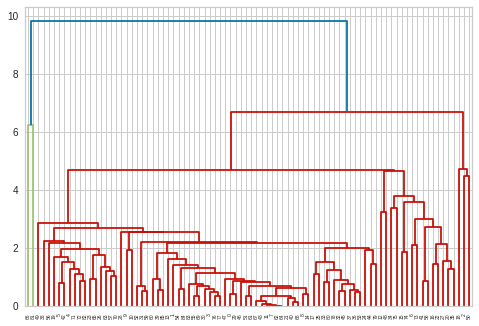

In [153]:
for i in [2, 3, 4, 5]:
    
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')

    model.fit(df_scaler_con)
    cluster_labels = model.labels_
    silhouette_avg = silhouette_score(df_scaler_con, cluster_labels)
    print('Numero de clusters: {} Silhouette: {}'.format(np.unique(model.labels_),silhouette_avg))
    
dendrogram = sch.dendrogram(sch.linkage(df_scaler_con, method='ward'))

Boa parte dos algoritmos tem mostrado melhor valor de silhoutte para formação de 2 cluster. Entretanto, vale observar que um desses grupos possui densidade bem inferior ao outro.

In [154]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(df_scaler_con)
cluster_labels = model.labels_

In [155]:
df_consolidado['agg2'] = cluster_labels

In [156]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [157]:
df_consolidado.loc[df_consolidado['agg2']==1]

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial,dbscan_eps5.7,km2,agg2
nome,,,,,,,,,,,,,,,,,,,,,
PETROLEO BRASILEIRO S.A. PETROBRAS,1.350400e+10,0.0,0.000000e+00,435000000.0,6.594550e+11,3.280181e+12,4.774060e+11,3.939636e+12,0.0,1.552050e+10,...,-9.697000e+09,-1.430090e+11,2.482880e+11,-1.333120e+11,-9.909050e+10,0.000000e+00,-8.700500e+09,-1,0,1
VALE S.A.,4.005635e+09,0.0,2.002818e+09,0.0,4.406399e+11,1.383640e+12,3.397612e+11,1.824280e+12,0.0,1.046458e+09,...,1.177927e+11,6.140241e+10,1.978855e+11,-5.639029e+10,5.743978e+10,-8.875000e+09,-1.113244e+10,0,0,1


Petrobras e Vale tanto para o Kmeans quanto para o Hierarquico aglomerativo fazem parte de um grupo separado.

## PCA para Consolidado

In [158]:
from sklearn.decomposition import PCA

In [159]:
pca = PCA(random_state=42, n_components=6)

In [162]:
array_pca = pca.fit_transform(df_scaler_con)
df_pca_con = pd.DataFrame(array_pca, columns=['componente1','componente2','componente3','componente4','componente5','componente6'])

In [163]:
df_pca_con

,componente1,componente2,componente3,componente4,componente5,componente6
0,-0.500703,0.266777,0.054234,-0.042484,0.019278,-0.113388
1,-0.430959,0.191964,0.056201,-0.087014,0.091827,-0.145760
2,1.434867,-2.122256,-0.684331,-0.262159,2.427470,-0.360482
3,-0.305881,0.114966,-0.039945,-0.023261,-0.060709,-0.024621
4,0.144750,-0.105306,-0.089371,-0.247592,-0.035438,-0.116369
...,...,...,...,...,...,...
81,3.912417,-0.280411,3.547883,-0.794658,-0.239646,-0.218306
82,-0.084361,0.170764,-0.091173,-0.201675,-0.020696,-0.198281
83,-0.124719,0.111717,0.066140,-0.162532,0.005456,-0.145113
84,-0.247220,-0.012655,0.020683,-0.121144,0.193378,-0.140453


In [164]:
# Primeiro componente explica 26% das features, cada um dos demais componentes representam menos de 1%
pca.explained_variance_ratio_

array([0.26371096, 0.09784691, 0.08562187, 0.06262791, 0.05175409,
       0.04002831])

Numero de clusters: [0 1] Silhouette: 0.8241570659625845
Numero de clusters: [0 1 2] Silhouette: 0.7530036846318606
Numero de clusters: [0 1 2 3] Silhouette: 0.7540481467600983
Numero de clusters: [0 1 2 3 4] Silhouette: 0.6924336710345139


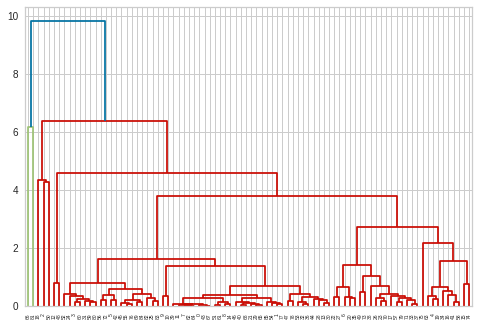

In [165]:
for i in [2, 3, 4, 5]:
    
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')

    model.fit(df_pca_con)
    cluster_labels = model.labels_
    silhouette_avg = silhouette_score(df_pca_con, cluster_labels)
    print('Numero de clusters: {} Silhouette: {}'.format(np.unique(model.labels_),silhouette_avg))
    
dendrogram = sch.dendrogram(sch.linkage(df_pca_con, method='ward'))

In [166]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(df_pca_con)
cluster_labels = model.labels_

In [167]:
df_consolidado['agg2_pca'] = cluster_labels

In [168]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [169]:
df_consolidado.loc[df_consolidado['agg2_pca']==1]

descricao_conta,Aplicações Financeiras,Aplicações Financeiras Avaliadas a Valor Justo através de Outros Resultados Abrangentes,Aplicações Financeiras Avaliadas a Valor Justo através do Resultado,Aplicações Financeiras Avaliadas ao Custo Amortizado,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Biológicos,Ativos Não-Correntes a Venda,...,Resultado Antes dos Tributos sobre o Lucro,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial,dbscan_eps5.7,km2,agg2,agg2_pca
nome,,,,,,,,,,,,,,,,,,,,,
PETROLEO BRASILEIRO S.A. PETROBRAS,1.350400e+10,0.0,0.000000e+00,435000000.0,6.594550e+11,3.280181e+12,4.774060e+11,3.939636e+12,0.0,1.552050e+10,...,-1.430090e+11,2.482880e+11,-1.333120e+11,-9.909050e+10,0.000000e+00,-8.700500e+09,-1,0,1,1
VALE S.A.,4.005635e+09,0.0,2.002818e+09,0.0,4.406399e+11,1.383640e+12,3.397612e+11,1.824280e+12,0.0,1.046458e+09,...,6.140241e+10,1.978855e+11,-5.639029e+10,5.743978e+10,-8.875000e+09,-1.113244e+10,0,0,1,1


Mesmo utilizando pca, o grupo minoritário continua com VALE e PETROBRAS.